# Experiment setup

Belangrijk is dat je gegenereerde json files hebt in de standaard map. Persoonlijk genereer ik ze met een 'just' recipe. Dit is een tool die het makkelijker kan maken om bepaalde taken te runnen die veel argumenten nodig heeft (het gebruik van 'just' is hiermee kort door de bocht maar tot nu toe heeft het slechts deze functie). In ons geval kan het helpen om experimenten te standardiseren.

Bijvoorbeeld, momenteel heb ik in de `justfile` uit de algemene repo volgend commando aangemaakt:

In [1]:
!just --list

Available recipes:
    run_test_game_experiment # General game experiment testrun for proof of concept


waarmee je het experiment kan oproepen door:
```zsh
just run_test_game_experiment
```
Under the hood is dit niets meer dan een oproep van:

```zsh
python capture.py \
    --record \
    --record-log \
    --delay-step 0.0 \
    -u testrun \
    -n 20 \
    -l RANDOM \
    -q \
    --red-name RedTest \
    --blue-name BlueTest \
    -c
```
> **Warning:**
> eigenlijk gebruikt de huidige justfile `uv run` ipv `python` bij de oproep aangezien ik zelf uv package manager gebruik en ik uv run moet gebruiken om scripts vanuit de omgeving te runnen. Ik kan later bekijken om dit flexibeler te maken zodat je de experimenten ook kan runnen

de -q en delay optie versnellen de runs aanzienlijk.

Merk op dat er 20 runs zijn, allemaal op een random gegenereerde layout. Belangrijk hierbij is ook de naam van de run (testrun) en de team namen (RedTest, BlueTest). Dit zal later de tabellen en figuren wat informatiever kunnen maken.

# GameAnalysis object

Dit object doet niets meer dan de json file omzetten in een python object waarmee we panda dataframes kunnen maken.

Belangrijk is dat je een absoluut pad naar de json file meegeeft. Omdat we allebei op andere operating systems zitten is het nuttig om `pathlib` objecten te gebruiken in plaats van strings. Namelijk, macOS en Linxu systemen gebruiken Posix voor pahts daar waar windows een eigen systeem heeft. De path library construeert de juiste paden afhanklijk van je operating system.

In de algemene repo is er een config file die een variabele `PROJ_ROOT` bevat. Deze zou een absoluut pad naar de algemene repository moeten terug geven. Merk op dat dit bij dus onderstaande pad geeft, hoewel dit bij jou anders zou moeten zijn

In [2]:
from agents.DotGobblers.config import PROJ_ROOT

print(PROJ_ROOT)

/Users/eliseygretchko/Repositories/unif/capture-the-flag


In [3]:
# these help to reload the packages when changes happen to them
%load_ext autoreload
%autoreload 2

from agents.DotGobblers.config import PROJ_ROOT
from pathlib import Path
from GameAnalysis import GameAnalysis

# Make sure to use Path to provide a path
json_path = Path(PROJ_ROOT, 'www', 'contest_testrun', 'scores','match_0.json')

In [4]:
experiment = GameAnalysis(json_path)
print(experiment.experiment_name)
print(experiment.experiment_time)

testrun
Thu Feb 19 23:39:42 2026


In [5]:
experiment.team_stats_dataframe

,points_percentage,points,wins,draws,losses,errors,sum_score,team
BlueTest,40.0,24.0,3.0,15.0,2.0,0.0,84.0,BlueTest
RedTest,35.0,21.0,2.0,15.0,3.0,0.0,56.0,RedTest


In [6]:
experiment.games_dataframe

,team_1,team_2,layout,score,winner,time_taken,match_number
0,RedTest,BlueTest,RANDOM947413,0,NaN,12.0,0
1,RedTest,BlueTest,RANDOM28683405,0,NaN,12.0,0
2,RedTest,BlueTest,RANDOM6881312,0,NaN,12.0,0
3,RedTest,BlueTest,RANDOM93417234,28,BlueTest,12.0,0
4,RedTest,BlueTest,RANDOM53418207,0,NaN,12.0,0
5,RedTest,BlueTest,RANDOM60564287,0,NaN,12.0,0
6,RedTest,BlueTest,RANDOM34227494,0,NaN,12.0,0
7,RedTest,BlueTest,RANDOM96762654,0,NaN,12.0,0
8,RedTest,BlueTest,RANDOM53038660,28,BlueTest,12.0,0
9,RedTest,BlueTest,RANDOM57784164,0,NaN,12.0,0


In principe kan je vanaf hier verder werken met de tabellen om grafieken te maken, hoewel we met deze data relatief beperkt zijn. Anderzijds, als we resultaten van allerlei figuren in één opslag willen zien kan een figuur wel wat meer overzicht geven. Standaard figuren en of tabellen kunnen opzich ook in het object gegenereerd worden.

In [7]:
experiment.team_stats_dataframe[['wins', 'draws', 'losses','team']]

,wins,draws,losses,team
BlueTest,3.0,15.0,2.0,BlueTest
RedTest,2.0,15.0,3.0,RedTest


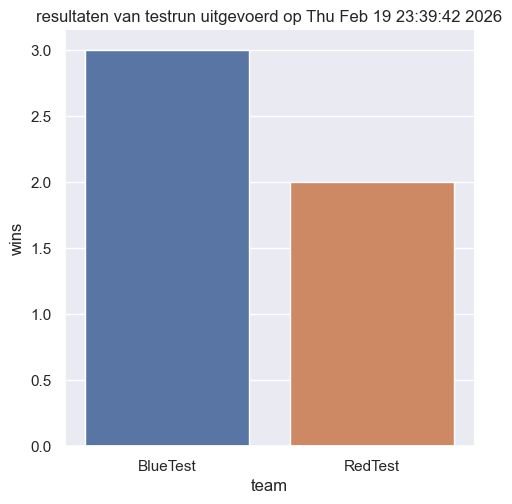

In [8]:
import seaborn as sns
sns.set_theme()
ax = sns.catplot(
    kind="bar",
    data=experiment.team_stats_dataframe,
    x="team",
    y= "wins",
    hue="team",

).set(title=f"resultaten van {experiment.experiment_name} uitgevoerd op {experiment.experiment_time}")
